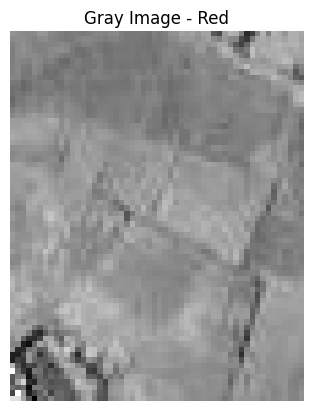

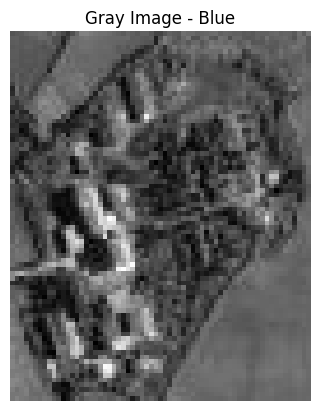

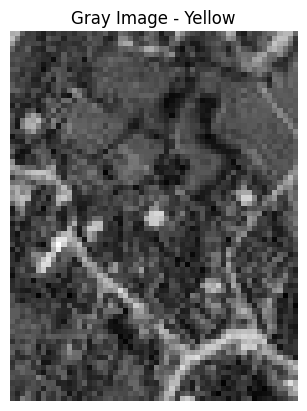

Red Region - Mean: 79.04, Std: 12.38, Variance: 153.36
Blue Region - Mean: 71.06, Std: 30.15, Variance: 908.87
Yellow Region - Mean: 71.79, Std: 36.01, Variance: 1296.56
Red and Yellow: 11 <= 10
Red and Yellow are NOT similar.
Red and Blue: 12 <= 11
Red and Blue are NOT similar.
Yellow and Blue: 13 <= 13
Yellow and Blue are similar.


In [29]:
# Comparing With Std-Mean-Size

import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import log10, floor

def calculate_statistics(region, name):
    mean = np.mean(region)
    variance = np.var(region)
    std = np.sqrt(variance)
    print(f"{name} Region - Mean: {mean:.2f}, Std: {std:.2f}, Variance: {variance:.2f}")
    return mean, std, variance

def compare_regions(region1_data, region2_data, region1_name, region2_name):

    std1, size1 = region1_data
    std2, size2 = region2_data
    
    merged_std = np.std(np.concatenate((regions[region1_name].flatten(), regions[region2_name].flatten())))
    all_std = floor(((size1 + size2) * log10(merged_std)) / 1000)
    each_std = floor(((size1 * log10(std1)) + (size2 * log10(std2))) / 1000)
    
    print(f"{region1_name} and {region2_name}: {all_std} <= {each_std}")
    if all_std <= each_std:
        print(f"{region1_name} and {region2_name} are similar.")
    else:
        print(f"{region1_name} and {region2_name} are NOT similar.")

def load_image_and_show(path, title):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()
    return gray

paths = {'Red': 'red.jpg', 'Blue': 'blue.jpg', 'Yellow': 'yellow.jpg'}
regions = {name: load_image_and_show(path, f"Gray Image - {name}") for name, path in paths.items()}

region_stats = {}
for name, region in regions.items():
    mean, std, variance = calculate_statistics(region, name)
    region_stats[name] = {'std': std, 'size': region.size, 'variance': variance}

region_pairs = [('Red', 'Yellow'), ('Red', 'Blue'), ('Yellow', 'Blue')]
for r1, r2 in region_pairs:
    compare_regions((region_stats[r1]['std'], region_stats[r1]['size']),
                    (region_stats[r2]['std'], region_stats[r2]['size']),
                    r1, r2)

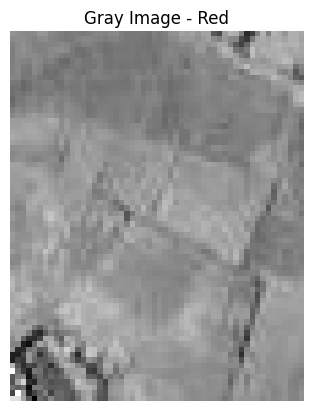

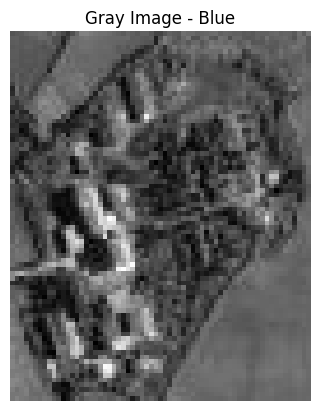

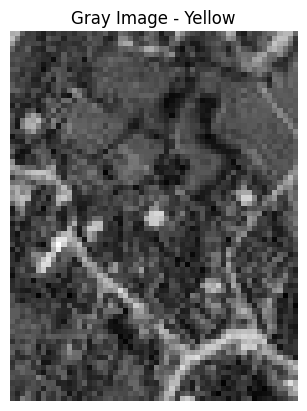

Red Region - Mean: 79.04, Variance: 153.36
Blue Region - Mean: 71.06, Variance: 908.87
Yellow Region - Mean: 71.79, Variance: 1296.56
Comparing Red and Yellow:
  Mean Difference: 7.26
  Variance Difference: 1143.20
Red and Yellow are NOT similar.
Comparing Red and Blue:
  Mean Difference: 7.99
  Variance Difference: 755.51
Red and Blue are NOT similar.
Comparing Yellow and Blue:
  Mean Difference: 0.73
  Variance Difference: 387.69
Yellow and Blue are similar.


In [30]:
# Comparing With Std-Variance

import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_statistics(region, name):
    mean = np.mean(region)
    variance = np.var(region)
    print(f"{name} Region - Mean: {mean:.2f}, Variance: {variance:.2f}")
    return mean, variance

def compare_regions(region1_data, region2_data, region1_name, region2_name):
    mean1, var1 = region1_data
    mean2, var2 = region2_data

    mean_diff = abs(mean1 - mean2)
    var_diff = abs(var1 - var2)

    print(f"Comparing {region1_name} and {region2_name}:")
    print(f"  Mean Difference: {mean_diff:.2f}")
    print(f"  Variance Difference: {var_diff:.2f}")

    if mean_diff < 20 and var_diff < 500:
        print(f"{region1_name} and {region2_name} are similar.")
    else:
        print(f"{region1_name} and {region2_name} are NOT similar.")

def load_image_and_show(path, title):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.title(title)
    plt.axis("off")
    plt.show()
    return gray

paths = {'Red': 'red.jpg', 'Blue': 'blue.jpg', 'Yellow': 'yellow.jpg'}
regions = {name: load_image_and_show(path, f"Gray Image - {name}") for name, path in paths.items()}

region_stats = {}
for name, region in regions.items():
    mean, variance = calculate_statistics(region, name)
    region_stats[name] = {'mean': mean, 'variance': variance}

region_pairs = [('Red', 'Yellow'), ('Red', 'Blue'), ('Yellow', 'Blue')]
for r1, r2 in region_pairs:
    compare_regions((region_stats[r1]['mean'], region_stats[r1]['variance']),
                    (region_stats[r2]['mean'], region_stats[r2]['variance']),
                    r1, r2)

In [33]:
# Comparing With Std-Mean-Size in RGB channel

import cv2
import numpy as np
from math import log10, floor

def calculate_channel_statistics(image, name):
    channels = cv2.split(image)
    stats = {}
    for i, channel_name in enumerate(['Red', 'Green', 'Blue']):
        mean = np.mean(channels[i])
        std = np.std(channels[i])
        stats[channel_name] = {'mean': mean, 'std': std, 'data': channels[i]}
        print(f"{name} {channel_name} - Mean: {mean:.2f}, Std: {std:.2f}")
    return stats

def compare_channel_stats(stats1, stats2, name1, name2):
    similar_channels = 0 
    for channel in ['Red', 'Green', 'Blue']:
        std1, std2 = stats1[channel]['std'], stats2[channel]['std']
        data1, data2 = stats1[channel]['data'], stats2[channel]['data']
        size1, size2 = np.prod(data1.shape), np.prod(data2.shape)
        
        merged_std = np.std(np.concatenate((data1.flatten(), data2.flatten())))

        all_std = floor(((size1 + size2) * log10(merged_std)) / 1000)
        each_std = floor(((size1 * log10(std1)) + (size2 * log10(std2))) / 1000)

        print(f"{name1} vs {name2} - {channel}: all-std = {all_std}, each_std = {each_std}")

        if all_std <= each_std:  
            print(f"{channel} channel of {name1} and {name2} are similar.")
            similar_channels += 1  
        else:
            print(f"{channel} channel of {name1} and {name2} are NOT similar.")
    
    if similar_channels >= 2:  
        print(f"\nOverall result: {name1} and {name2} are similar.")
    else:
        print(f"\nOverall result: {name1} and {name2} are NOT similar.")

image1 = cv2.imread('yellow.jpg')
image2 = cv2.imread('blue.jpg') 

stats1 = calculate_channel_statistics(image1, 'Image1')
stats2 = calculate_channel_statistics(image2, 'Image2')

compare_channel_stats(stats1, stats2, 'Image1', 'Image2')

Image1 Red - Mean: 73.58, Std: 34.09
Image1 Green - Mean: 74.06, Std: 35.70
Image1 Blue - Mean: 66.66, Std: 38.43
Image2 Red - Mean: 71.06, Std: 27.40
Image2 Green - Mean: 74.52, Std: 30.73
Image2 Blue - Mean: 64.27, Std: 31.67
Image1 vs Image2 - Red: all-std = 13, each_std = 13
Red channel of Image1 and Image2 are similar.
Image1 vs Image2 - Green: all-std = 14, each_std = 13
Green channel of Image1 and Image2 are NOT similar.
Image1 vs Image2 - Blue: all-std = 14, each_std = 14
Blue channel of Image1 and Image2 are similar.

Overall result: Image1 and Image2 are similar.
